<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QiskitFunction_GetStartedWith_mkbahk_20241010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Qiskit Functions](https://docs.quantum.ibm.com/guides/functions)

In [21]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-ibm-runtime==0.30.0
%pip install qiskit-transpiler-service==0.4.10
%pip install qiskit-aer==0.15.1
%pip install qiskit-ibm-catalog==0.1.0

ERROR: Ignored the following versions that require a different python version: 0.1.0 Requires-Python >=3.11
ERROR: Could not find a version that satisfies the requirement qiskit-ibm-catalog==0.1.0 (from versions: 0.0.0)
ERROR: No matching distribution found for qiskit-ibm-catalog==0.1.0


In [22]:
%pip show qiskit qiskit-ibm-runtime qiskit-transpiler-service qiskit-aer qiskit-ibm-catalog

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import, qiskit-serverless, qiskit-transpiler-service
---
Name: qiskit-ibm-runtime
Version: 0.30.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: qiskit-serverless


In [ ]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog

tem_function_name = "algorithmiq/tem"

catalog = QiskitFunctionsCatalog(token="<YOUR_IQP_API_TOKEN>")

# Load your function
tem = catalog.load(tem_function_name)

In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService

In [16]:
#Create a quantum circuit
qc = QuantumCircuit(3)
qc.u(0.4, 0.9, -0.3, 0)
qc.u(-0.4, 0.2, 1.3, 1)
qc.u(-1.2, -1.2, 0.3, 2)
for _ in range(2):
    qc.barrier()
    qc.cx(0, 1)
    qc.cx(2, 1)
    qc.barrier()
    qc.u(0.4, 0.9, -0.3, 0)
    qc.u(-0.4, 0.2, 1.3, 1)
    qc.u(-1.2, -1.2, 0.3, 2)
###

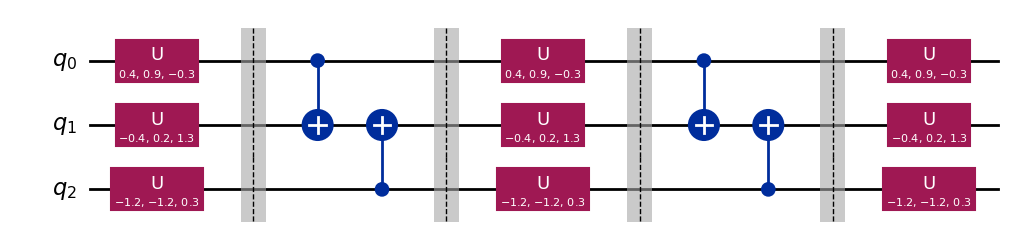

In [17]:
qc.draw("mpl")

In [18]:
# Define the observables
observable = SparsePauliOp("IYX", 1.0)

In [20]:
#Define the execution options
QiskitRuntimeService.save_account(channel="ibm_quantum", token="")

service = QiskitRuntimeService()
backend_name = service.least_busy(operational=True).name

instance = "<IQP_HUB/IQP_GROUP/IQP_PROJECT>"

pub = (qc, [observable])
options = {"default_precision": 0.02}

job = tem.run(pubs=[pub], instance=instance, backend_name=backend_name, options=options)

NameError: name 'tem' is not defined

In [ ]:
print(job.status())

In [ ]:
result = job.result()
evs = result[0].data.evs

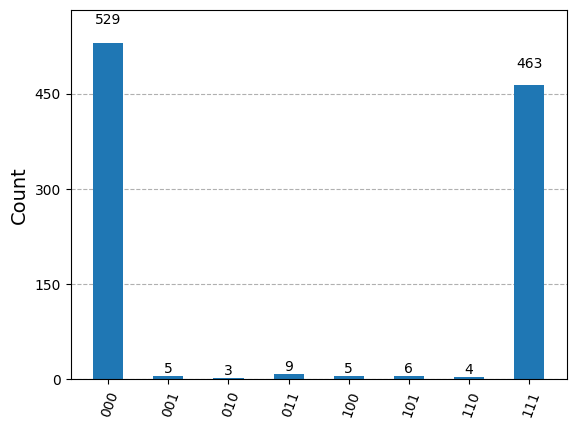

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)